In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [3]:
!pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import splitfolders
splitfolders.ratio("../content/gdrive/My Drive/brain_tumor_dataset", output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 253 files [01:08,  3.72 files/s] 


In [5]:
train_path="/content/output/train"
val_path="/content/output/val"
test_path="/content/output/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [6]:
list = os.listdir("/content/output/train/yes") + os.listdir("/content/output/train/no") # dir is your directory path
Total_Traindata = len(list)

list = os.listdir("/content/output/val/yes") + os.listdir("/content/output/val/no") # dir is your directory path
Total_Valdata = len(list)

list = os.listdir("/content/output/test/no") + os.listdir("/content/output/test/no") # dir is your directory path
Total_Testdata = len(list)

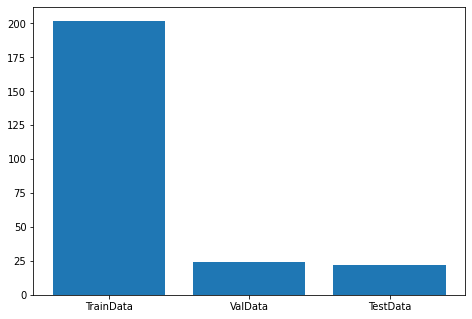

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['TrainData', 'ValData', 'TestData']
Data = [Total_Traindata,Total_Valdata,Total_Testdata ]
ax.bar(langs,Data)
plt.show()

In [8]:
labels = []
for i in os.listdir(train_path):
    labels+=[i]


In [9]:
labels

['yes', 'no']

In [10]:
import random
import matplotlib.image as mpimg
def load_random_imgs_from_folder(folder,label):
  plt.figure(figsize=(15,15))
  for i in range(3):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,3,i+1)
    ax.title.set_text(label)
    plt.xlabel(f'Name: {file}')
    plt.imshow(img)
    

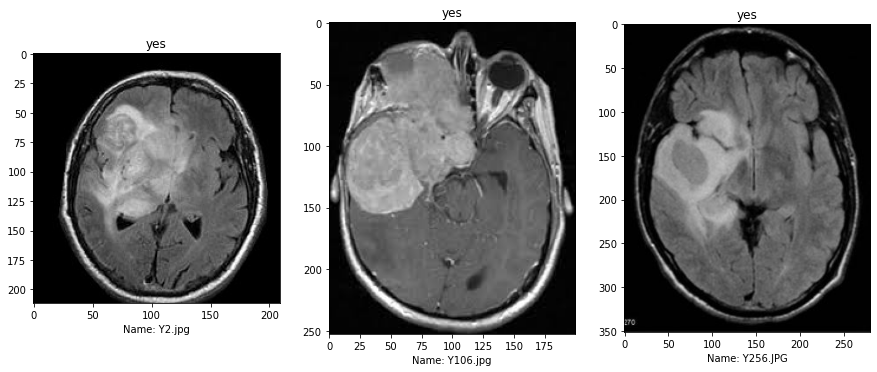

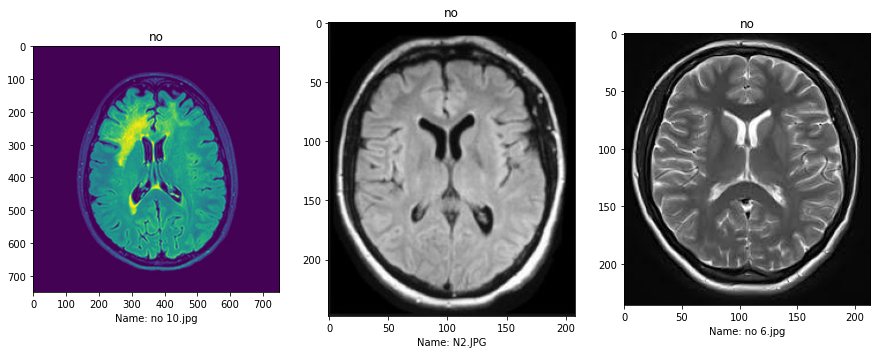

In [11]:
data_dir = "../content/gdrive/My Drive/brain_tumor_dataset"
for label in labels:
    load_random_imgs_from_folder(f"{data_dir}/{label}",label)

In [39]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(331, 331),batch_size=32,shuffle=True,class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path,target_size=(331,331),batch_size=32,shuffle=False,class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,target_size=(331,331),batch_size=32,shuffle=False,class_mode='binary')

Found 202 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


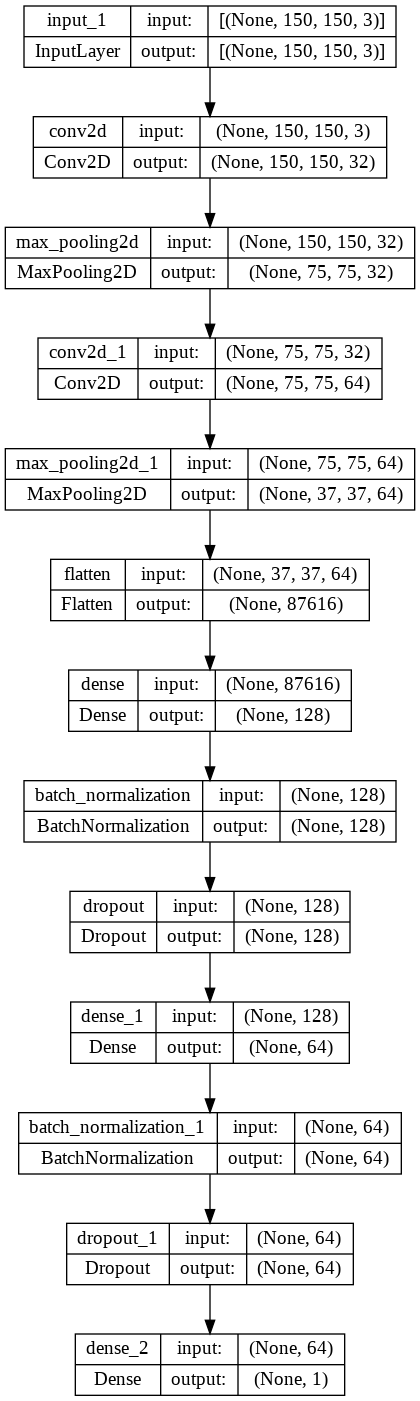

In [25]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [30]:
from tensorflow.keras.applications import  NASNetLarge

model = NASNetLarge(
      input_shape = (331,331
                     ,3),
      include_top = False,
      weights = 'imagenet'
    )

343610240/343610240 [==============================] - 21s 0us/step


In [31]:
for layers in model.layers:
    layers.trainable = False
     

In [32]:
from keras.layers import  Dropout
x = Flatten()(model.output)
x = Dropout(0.5)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 165, 165, 96  2592        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 165, 165, 96  384         ['stem_conv1[0][0]']             
                                )                                                             

In [35]:

es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor='val_accuracy', mode='max' )


In [40]:
History = model.fit(train_generator,validation_data = val_generator, epochs = 100, verbose=1,callbacks=[es])


Epoch 1/100
7/7 [==============================] - 83s 13s/step - loss: 8.1809 - accuracy: 0.5495 - val_loss: 7.3952 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 8s 1s/step - loss: 8.2361 - accuracy: 0.5792 - val_loss: 12.8977 - val_accuracy: 0.6667
Epoch 3/100
7/7 [==============================] - 8s 1s/step - loss: 5.2379 - accuracy: 0.6881 - val_loss: 3.0315 - val_accuracy: 0.7083
Epoch 4/100
7/7 [==============================] - 8s 1s/step - loss: 3.5869 - accuracy: 0.6832 - val_loss: 1.8122 - val_accuracy: 0.6250
Epoch 5/100
7/7 [==============================] - 8s 1s/step - loss: 5.0332 - accuracy: 0.6485 - val_loss: 8.1364 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 8s 1s/step - loss: 6.8166 - accuracy: 0.6980 - val_loss: 5.2150 - val_accuracy: 0.6250
Epoch 7/100
7/7 [==============================] - 8s 1s/step - loss: 4.1763 - accuracy: 0.7178 - val_loss: 5.3713 - val_accuracy: 0.7083
Epoch 8/100
7/7 [==============

Text(0, 0.5, 'accuracy')

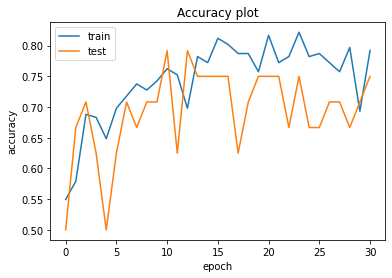

In [41]:
hist = History.history
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

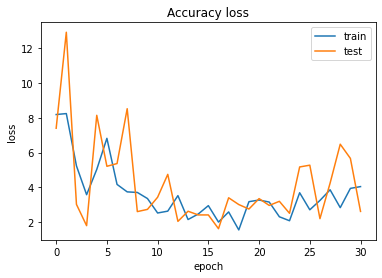

In [43]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [50]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [54]:
model.evaluate_generator(test_generator)


<ipython-input-54-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[1.479614019393921, 0.9259259104728699]

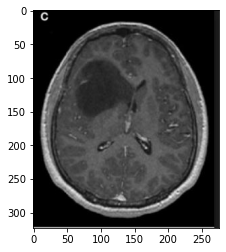

In [55]:
from cv2 import imread
yes_path = test_path+"/yes/"+os.listdir(test_path+"/yes/")[9]

tumour = imread(yes_path)
image_resized= cv2.resize(tumour, (331 ,331))
image=np.expand_dims(image_resized,axis=0)
plt.imshow(tumour)
     

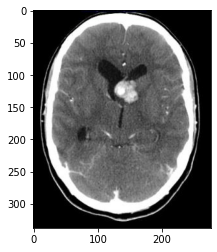

In [58]:
from cv2 import imread
no_path = test_path+"/no/"+os.listdir(test_path+"/no/")[9]

tumour = imread(no_path)
image_resized= cv2.resize(tumour, (331 ,331))
image=np.expand_dims(image_resized,axis=0)
plt.imshow(tumour)
     

In [59]:
pred=model.predict(image)

output_class=class_names[np.argmax(pred)]
print("The prson having tumor", output_class)

1/1 [==============================] - 0s 53ms/step
The prson having tumor yes
